In [79]:
#  Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

In [80]:
print ('Python version ' + sys.version)
print ('Pandas version ' + pd.__version__)

Python version 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
Pandas version 1.5.3


# Create data

Dataset consisting of 1000 names and number of births for that year

In [81]:
names = ['Bob','Jessica','Mary','John','Mel']

To make a random list of 1,000  names using the five above we will do the following:

Generate a random number between 0 and 4
To do this we will be using the functions seed, randint, len, range, and zip.

In [82]:
# This means the random samples will always be identical.

random.seed?

In [5]:
random.randint?

In [83]:
len?

In [84]:
range?

In [85]:
zip?

seed(500) - Create seed

randint(low=0,high=len(names)) - Generate a random integer between zero and the length of the list "names".

names[n] - Select the name where its index is equal to n.

for i in range(n) - Loop until i is equal to n, i.e. 1,2,3,....n.

random_names = Select a random name from the name list and do this n times.

In [86]:
random.seed(500)
random_names = [names[random.randint(low=0,high=len(names))] for i in range(1000)]

# Print first 10 records
random_names[:10]

['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

Generate a random numbers between 0 and 1000

In [87]:
# The number of births per name for the year 1880
births = [random.randint(low=0,high=1000) for i in range(1000)]
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

Merge the names and the births data set using the zip function.

In [154]:
BabyDataSet = zip(random_names,births)


We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.

df will be a DataFrame object. You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside df.

In [155]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


Export the dataframe to a text file. We can name the file births1880.txt. The function to_csv will be used to export. The file will be saved in the same location of the notebook unless specified otherwise.

In [156]:
df.to_csv?

The only parameters we will use is index and header. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [157]:
df.to_csv('births1880.txt',index=False,header=False)

# Get Data 

To pull in the text file, we will use the pandas function read_csv. Let us take a look at this function and what inputs it takes.

In [158]:
pd.read_csv?

Even though this functions has many parameters, we will simply pass it the location of the text file.
C:\Users\bakhshi\Desktop\numpy\births1880.txt

In [159]:
Location = r'C:\Users\bakhshi\Desktop\numpy\births1880.txt'
df = pd.read_csv(Location)

Notice the r before the string. Since the slashes are special characters, prefixing the string with a r will escape the whole string.

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   968     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Summary says:

There are 999 records in the data set
There is a column named Mary with 999 values
There is a column named 968 with 999 values
Out of the two columns, one is numeric, the other is non numeric
To actually see the contents of the dataframe we can use the head() function which by default will return the first five records. You can also pass in a number n to return the top n records of the dataframe.

In [161]:
df.head()

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


This brings us the our first problem of the exercise. The read_csv function treated the first record in the text file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).

In [162]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Summary now says:

There are 1000 records in the data set
There is a column named 0 with 1000 values
There is a column named 1 with 1000 values
Out of the two columns, one is numeric, the other is non numeric
Now lets take a look at the last five records of the dataframe

In [164]:
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


If we wanted to give the columns specific names, we would have to pass another paramter called names. We can also omit the header parameter.

In [165]:
df = pd.read_csv(Location, names=['Names','Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


You can think of the numbers [0,1,2,3,4,...] as the row numbers in an Excel file. In pandas these are part of the index of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the txt file now that we are done using it.

In [166]:
# import os
# os.remove(Location)

# Prepare Data

The data we have consists of baby names and the number of births in the year 1880. We already know that we have 1,000 records and none of the records are missing (non-null values). We can verify the "Names" column still only has five unique names.

We can use the unique property of the dataframe to find all the unique records of the "Names" colum

In [170]:
# Method 1:
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [171]:
# If you actually want to print the unique values:
for x in df['Names'].unique():
    print (x)

Mary
Jessica
Bob
John
Mel


In [172]:
# Method 2:
print (df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


Since we have multiple values per baby name, we need to aggregate this data so we only have a baby name appear once. This means the 1,000 rows will need to become 5. We can accomplish this by using the groupby function.

In [173]:
df.groupby?

In [174]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the groupby object
df = name.sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


# Analyze Data

To find the most popular name or the baby name with the higest birth rate, we can do one of the following.

Sort the dataframe and select the top row
Use the max() attribute to find the maximum value

In [175]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Births
Names,
Bob,106817


In [176]:
# Method 2:
df['Births'].max()

106817

# Present Data

Here we can plot the Births column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that Bob is the most popular baby name in the data set.

The most popular name


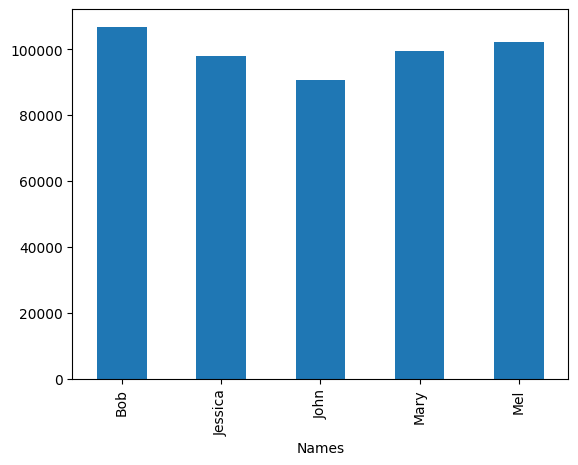

In [177]:
# Create graph
df['Births'].plot(kind='bar')

print ("The most popular name")
